# Welcome to my Riot Games demo Notebook
    This notebook is a demo of what you can do in Jupyter
    Here I have set up a local instance of Jupyter and analyzed some data that I have pulled down from the Riot Games API
    This allows you to look at this video game data and make charts and graphs based off of that data

import libraries and set up

In [1]:
champ_dict[101]

NameError: name 'champ_dict' is not defined

In [2]:
import json
import pandas as pd
import requests
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
key = '98d64dad-53c8-43e0-b947-aaee85100403'

In [8]:
#url = 'https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/Teemo?api_key='+key
#response = requests.get(url)
#print(response.json())

In [17]:
#champion info names
url = 'https://global.api.pvp.net/api/lol/static-data/na/v1.2/champion?api_key=98d64dad-53c8-43e0-b947-aaee85100403'
championInfo = requests.get(url)
pprint.pprint(championInfo.json())

{'data': {'Aatrox': {'id': 266,
                     'key': 'Aatrox',
                     'name': 'Aatrox',
                     'title': 'the Darkin Blade'},
          'Ahri': {'id': 103,
                   'key': 'Ahri',
                   'name': 'Ahri',
                   'title': 'the Nine-Tailed Fox'},
          'Akali': {'id': 84,
                    'key': 'Akali',
                    'name': 'Akali',
                    'title': 'the Fist of Shadow'},
          'Alistar': {'id': 12,
                      'key': 'Alistar',
                      'name': 'Alistar',
                      'title': 'the Minotaur'},
          'Amumu': {'id': 32,
                    'key': 'Amumu',
                    'name': 'Amumu',
                    'title': 'the Sad Mummy'},
          'Anivia': {'id': 34,
                     'key': 'Anivia',
                     'name': 'Anivia',
                     'title': 'the Cryophoenix'},
          'Annie': {'id': 1,
                    'key': 'Annie',


In [18]:
champ_dict = {}
for champion in championInfo.json()['data']:
    champ_dict[championInfo.json()['data'][champion]['id']] = championInfo.json()['data'][champion]['name']
    #print(championInfo.json()['data'][champion]['name'])
    #print(championInfo.json()['data'][champion]['id'])

In [11]:
masteries_dict = {}
keystones_dict = {}

In [8]:
url = 'https://global.api.pvp.net/api/lol/static-data/na/v1.2/mastery?api_key='+key
mastery = requests.get(url)
masteryData = mastery.json()['data']

In [19]:
for masteryId in masteryData:
    masteries_dict[masteryData[masteryId]['id']] = masteryData[masteryId]['name']
    if(masteryId in (['6161', '6162', '6164', '6261', '6262', '6263', '6361', '6362', '6363'])):
        keystones_dict[masteryData[masteryId]['id']] = masteryData[masteryId]['name']

## Begin here by Selecting Summoner name

In [32]:
nameRequested = input("What summoner name do you want?  ")
nameRequestedFormatted = nameRequested.replace(' ', '%20')
url = 'https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/'+nameRequestedFormatted+'?api_key='+key
response = requests.get(url)
print(response.json())

What summoner name do you want?  DJ BootyWings
{'djbootywings': {'name': 'DJ BootyWings ', 'profileIconId': 1232, 'revisionDate': 1473063962000, 'id': 43372692, 'summonerLevel': 30}}


In [10]:
data = response.json()

In [11]:
#get Summoner ID and name
sumName = ''
for name in data:
    sumName = name
sumID = data[sumName]['id']
print(sumName)
sumID = str(sumID)
print('ID: '+sumID)

malibuschnapps
ID: 36030386


In [35]:
#Get Live Game info
url = 'https://na.api.pvp.net/observer-mode/rest/consumer/getSpectatorGameInfo/NA1/'+sumID+'?api_key='+key
#ex malibu schnapps is id: 36030386
live_game_response = requests.get(url)
pprint.pprint(live_game_response.json())

{'bannedChampions': [{'championId': 420, 'pickTurn': 1, 'teamId': 100},
                     {'championId': 41, 'pickTurn': 2, 'teamId': 200},
                     {'championId': 53, 'pickTurn': 3, 'teamId': 100},
                     {'championId': 122, 'pickTurn': 4, 'teamId': 200},
                     {'championId': 16, 'pickTurn': 5, 'teamId': 100},
                     {'championId': 40, 'pickTurn': 6, 'teamId': 200}],
 'gameId': 2274195729,
 'gameLength': 74,
 'gameMode': 'CLASSIC',
 'gameQueueConfigId': 410,
 'gameStartTime': 1471979826112,
 'gameType': 'MATCHED_GAME',
 'mapId': 11,
 'observers': {'encryptionKey': 'EYp67w8QyKbRCInnyDmQ32iCnjlZEH0s'},
 'participants': [{'bot': False,
                   'championId': 157,
                   'masteries': [{'masteryId': 6111, 'rank': 5},
                                 {'masteryId': 6122, 'rank': 1},
                                 {'masteryId': 6131, 'rank': 5},
                                 {'masteryId': 6141, 'rank': 1},
  

In [76]:
#get live game response teams
teamTwo = False
for summoner in live_game_response.json()['participants']:
    #pprint.pprint(summoner)
    
    if summoner['teamId']==200 and teamTwo==False:
        print('___________vs___________\n')
        teamTwo = True
        
    print(champ_dict[summoner['championId']])
    print('')
#    print("Team "+summoner['teamId']+':'+summoner['championId']

Yasuo

Thresh

Gnar

Vayne

Zac

___________vs___________

Elise

Twisted Fate

Leona

Ashe

Malphite



In [8]:
url = 'https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/'+sumID+'/summary?season=SEASON2016&api_key='+key
response = requests.get(url)
pprint.pprint(response.json())

{'playerStatSummaries': [{'aggregatedStats': {'averageAssists': 9,
                                              'averageChampionsKilled': 9,
                                              'averageCombatPlayerScore': 341,
                                              'averageNodeCapture': 6,
                                              'averageNodeCaptureAssist': 0,
                                              'averageNodeNeutralize': 6,
                                              'averageNodeNeutralizeAssist': 1,
                                              'averageNumDeaths': 3,
                                              'averageObjectivePlayerScore': 744,
                                              'averageTeamObjective': 1,
                                              'averageTotalPlayerScore': 1085,
                                              'maxAssists': 10,
                                              'maxChampionsKilled': 12,
                                      

# Get Ranked Stats

In [12]:
#get Ranked Stats
url = 'https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/'+sumID+'/ranked?season=SEASON2016&api_key='+key
rankedStats = requests.get(url)
pprint.pprint(rankedStats.json())

{'champions': [{'id': 236,
                'stats': {'maxChampionsKilled': 12,
                          'maxNumDeaths': 12,
                          'mostChampionKillsPerSession': 12,
                          'mostSpellsCast': 0,
                          'totalAssists': 31,
                          'totalChampionKills': 35,
                          'totalDamageDealt': 751894,
                          'totalDamageTaken': 97187,
                          'totalDeathsPerSession': 31,
                          'totalDoubleKills': 4,
                          'totalFirstBlood': 0,
                          'totalGoldEarned': 58841,
                          'totalMagicDamageDealt': 89932,
                          'totalMinionKills': 869,
                          'totalPentaKills': 0,
                          'totalPhysicalDamageDealt': 660383,
                          'totalQuadraKills': 0,
                          'totalSessionsLost': 2,
                          'totalSessions

In [13]:
#get all champion ranked stats by champ id and put into DF
personal_champ_ranked_stats = {}
for champ in rankedStats.json()['champions']:
    if(champ['id'] == 0):
        continue
    personal_champ_ranked_stats[champ['id']] = champ['stats']
    
df_personal_champ_ranked_stats = pd.DataFrame(personal_champ_ranked_stats)
df_personal_champ_ranked_stats = df_personal_champ_ranked_stats.T
df_personal_champ_ranked_stats['KDA'] = (df_personal_champ_ranked_stats.totalAssists + df_personal_champ_ranked_stats.totalChampionKills) / df_personal_champ_ranked_stats.totalDeathsPerSession
df_personal_champ_ranked_stats['winRatio'] = df_personal_champ_ranked_stats.totalSessionsWon / df_personal_champ_ranked_stats.totalSessionsPlayed
df_personal_champ_ranked_stats = df_personal_champ_ranked_stats.T

In [14]:
top_champs = df_personal_champ_ranked_stats.T.sort_values(by='totalSessionsPlayed', ascending=False)[0:5]

In [20]:
#show relevant stats for champs
text_top_champs = ''
champArray = []
for c in top_champs.T:
    print(c)
    text_top_champs += champ_dict[c] +'\n'
    text_top_champs +='Games Played: '+ str(top_champs.T[c].totalSessionsPlayed)+'\n'
    text_top_champs +='KDA: '+str(top_champs.T[c].KDA) +'\n'
    text_top_champs +='Win Ratio: {percent:.1%}'.format(percent=top_champs.T[c].winRatio)
    #text_top_champs +='\n'
    champArray.append(text_top_champs)
    text_top_champs = ''
print(text_top_champs)
print(champArray)

131
412
157
10
7

['Diana\nGames Played: 24.0\nKDA: 2.70503597122\nWin Ratio: 62.5%', 'Thresh\nGames Played: 18.0\nKDA: 3.0\nWin Ratio: 61.1%', 'Yasuo\nGames Played: 11.0\nKDA: 2.35897435897\nWin Ratio: 72.7%', 'Kayle\nGames Played: 5.0\nKDA: 3.24\nWin Ratio: 60.0%', 'LeBlanc\nGames Played: 4.0\nKDA: 3.52380952381\nWin Ratio: 75.0%']


In [31]:
foo = champArray.pop()

In [34]:
foo.split('\n')[0].lower()

'leblanc'

In [23]:
#show relevant stats for champs
text_top_champs = ''
for c in top_champs.T:
    text_top_champs += champ_dict[c] +'\n'
    text_top_champs +='Games Played: '+ str(top_champs.T[c].totalSessionsPlayed)+'\n'
    text_top_champs +='KDA: '+str(top_champs.T[c].KDA) +'\n'
    text_top_champs +='Win Ratio: {percent:.1%}'.format(percent=top_champs.T[c].winRatio)+'\n'
    text_top_champs +='\n'
print(text_top_champs)

Diana
Games Played: 24.0
KDA: 2.70503597122
Win Ratio: 62.5%

Thresh
Games Played: 18.0
KDA: 3.0
Win Ratio: 61.1%

Yasuo
Games Played: 11.0
KDA: 2.35897435897
Win Ratio: 72.7%

Kayle
Games Played: 5.0
KDA: 3.24
Win Ratio: 60.0%

LeBlanc
Games Played: 4.0
KDA: 3.52380952381
Win Ratio: 75.0%




# Summoner Summary Data

In [72]:
url = 'https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/'+sumID+'/summary?season=SEASON2016&api_key='+key
response = requests.get(url)
summoner_data = response.json()

In [73]:
summoner_data

{'playerStatSummaries': [{'aggregatedStats': {'totalAssists': 758,
    'totalChampionKills': 551,
    'totalTurretsKilled': 19},
   'modifyDate': 1462123925000,
   'playerStatSummaryType': 'AramUnranked5x5',
   'wins': 19},
  {'aggregatedStats': {'totalAssists': 181,
    'totalChampionKills': 123,
    'totalMinionKills': 1602,
    'totalNeutralMinionsKilled': 71,
    'totalTurretsKilled': 24},
   'modifyDate': 1458779610000,
   'playerStatSummaryType': 'CoopVsAI',
   'wins': 15},
  {'aggregatedStats': {},
   'modifyDate': 1458779610000,
   'playerStatSummaryType': 'OdinUnranked',
   'wins': 0},
  {'aggregatedStats': {'totalAssists': 378,
    'totalChampionKills': 281,
    'totalMinionKills': 3858,
    'totalNeutralMinionsKilled': 677,
    'totalTurretsKilled': 35},
   'modifyDate': 1466633057000,
   'playerStatSummaryType': 'Unranked',
   'wins': 21},
  {'aggregatedStats': {},
   'modifyDate': 1458779610000,
   'playerStatSummaryType': 'Unranked3x3',
   'wins': 0}],
 'summonerId': 4989

In [74]:
#print normal Game stats
normalGameIndex = 0
foo = 0
for gameTypeStats in summoner_data['playerStatSummaries']:
    if gameTypeStats['playerStatSummaryType'] == 'Unranked':
        normalGameIndex = foo
    foo+=1
        
print(summoner_data['playerStatSummaries'][normalGameIndex]['playerStatSummaryType'])
print('------------------')
print('wins: '+str(summoner_data['playerStatSummaries'][normalGameIndex]['wins']))
pprint.pprint(summoner_data['playerStatSummaries'][normalGameIndex]['aggregatedStats'])
print('')

Unranked
------------------
wins: 21
{'totalAssists': 378,
 'totalChampionKills': 281,
 'totalMinionKills': 3858,
 'totalNeutralMinionsKilled': 677,
 'totalTurretsKilled': 35}



## Show player game Statistics below

In [75]:
#print all game type stats
my_dict = {}
print('Stats for: '+nameRequested + '\n')
totalWins = 0
for gameType in summoner_data['playerStatSummaries']:
    print(gameType['playerStatSummaryType'])
    print('------------------')
    totalWins += gameType['wins']
    print('wins: '+str(gameType['wins']))
    pprint.pprint(gameType['aggregatedStats'])
    print('')
    my_dict[gameType['playerStatSummaryType']] = gameType['wins']

print('Total Wins in all Modes: '+str(totalWins))

Stats for: Farrell 1

AramUnranked5x5
------------------
wins: 19
{'totalAssists': 758, 'totalChampionKills': 551, 'totalTurretsKilled': 19}

CoopVsAI
------------------
wins: 15
{'totalAssists': 181,
 'totalChampionKills': 123,
 'totalMinionKills': 1602,
 'totalNeutralMinionsKilled': 71,
 'totalTurretsKilled': 24}

OdinUnranked
------------------
wins: 0
{}

Unranked
------------------
wins: 21
{'totalAssists': 378,
 'totalChampionKills': 281,
 'totalMinionKills': 3858,
 'totalNeutralMinionsKilled': 677,
 'totalTurretsKilled': 35}

Unranked3x3
------------------
wins: 0
{}

Total Wins in all Modes: 55


In [76]:
df_wins = pd.Series(my_dict, name='Wins')

In [77]:
df_wins = df_wins.reset_index().rename(columns={"index": "GameType"})

In [78]:
df_wins = df_wins.sort_values(by='Wins', ascending=False)

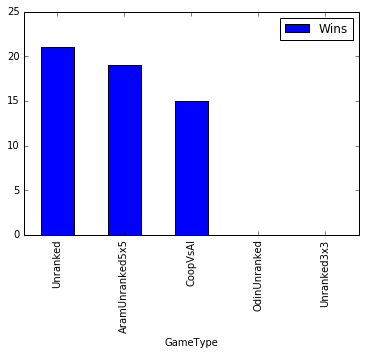

In [79]:
df_wins.plot.bar(x=df_wins.GameType)

In [186]:
df_personal_champ_ranked_stats.to_csv('Foo')

In [95]:
df = pd.read_json('matches1.json')

In [103]:
df['matches'][0]

{'mapId': 11,
 'matchCreation': 1451603074200,
 'matchDuration': 3067,
 'matchId': 2054994244,
 'matchMode': 'CLASSIC',
 'matchType': 'MATCHED_GAME',
 'matchVersion': '5.24.0.256',
 'participantIdentities': [{'participantId': 1,
   'player': {'matchHistoryUri': '/v1/stats/player_history/NA1/214684661',
    'profileIcon': 984,
    'summonerId': 51666047,
    'summonerName': 'jrizznezz'}},
  {'participantId': 2,
   'player': {'matchHistoryUri': '/v1/stats/player_history/NA1/205308031',
    'profileIcon': 627,
    'summonerId': 42726231,
    'summonerName': 'ConsumeSumWater'}},
  {'participantId': 3,
   'player': {'matchHistoryUri': '/v1/stats/player_history/NA1/212183251',
    'profileIcon': 786,
    'summonerId': 49262934,
    'summonerName': 'PuruPandey'}},
  {'participantId': 4,
   'player': {'matchHistoryUri': '/v1/stats/player_history/NA1/212845505',
    'profileIcon': 746,
    'summonerId': 50204765,
    'summonerName': 'NurseStun'}},
  {'participantId': 5,
   'player': {'matchHist

In [91]:
#example test code
champName = input("What Champion do we want? ")
url = 'https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/'+champName+'?api_key='+key
response = requests.get(url)
print(response.json())

{'teemo': {'name': 'Teemo', 'revisionDate': 1347299919000, 'profileIconId': 0, 'id': 35960410, 'summonerLevel': 6}}


In [16]:
#Get champion Data
url = 'https://na.api.pvp.net/api/lol/na/v1.2/champion?api_key=98d64dad-53c8-43e0-b947-aaee85100403'
response = requests.get(url)
pprint.pprint(response.json())

{'champions': [{'active': True,
                'botEnabled': False,
                'botMmEnabled': False,
                'freeToPlay': False,
                'id': 266,
                'rankedPlayEnabled': True},
               {'active': True,
                'botEnabled': False,
                'botMmEnabled': True,
                'freeToPlay': False,
                'id': 103,
                'rankedPlayEnabled': True},
               {'active': True,
                'botEnabled': False,
                'botMmEnabled': True,
                'freeToPlay': False,
                'id': 84,
                'rankedPlayEnabled': True},
               {'active': True,
                'botEnabled': True,
                'botMmEnabled': True,
                'freeToPlay': False,
                'id': 12,
                'rankedPlayEnabled': True},
               {'active': True,
                'botEnabled': True,
                'botMmEnabled': True,
                'freeToPlay': False,

# Get Player current rank

In [62]:
rank.status_code

200

In [61]:
url = 'https://na.api.pvp.net/api/lol/na/v2.5/league/by-summoner/'+sumID+'?api_key='+key
rank = requests.get(url)
pprint.pprint(rank.json())

{'36030386': [{'entries': [{'division': 'II',
                            'isFreshBlood': False,
                            'isHotStreak': False,
                            'isInactive': False,
                            'isVeteran': False,
                            'leaguePoints': 23,
                            'losses': 7,
                            'playerOrTeamId': '47489760',
                            'playerOrTeamName': 'GonzoBonzo',
                            'playstyle': 'NONE',
                            'wins': 7},
                           {'division': 'IV',
                            'isFreshBlood': False,
                            'isHotStreak': False,
                            'isInactive': False,
                            'isVeteran': False,
                            'leaguePoints': 30,
                            'losses': 57,
                            'playerOrTeamId': '39821426',
                            'playerOrTeamName': 'Packhuntintrolls'

In [33]:
for player in rank.json()[sumID][0]['entries']:
    if player['playerOrTeamId'] == sumID:
        print(rank.json()[sumID][0]['tier'])
        print(player['division'])
        print('LP: '+str(player['leaguePoints']))
        print('playstyle: '+player['playstyle'])

SILVER
II
LP: 0
playstyle: NONE


# IDEAS:
    Method to get summoner Ranked History
        - Get their top 5 champs by games played and then sort by KDA
    Run method for all summoners in match with you
        - get Summoner KDA for current champ they are playing
    Get player ranks

In [23]:
champ_dict[131]

'Diana'

In [29]:
getChampExp.json()['championLevel']

6

In [25]:
tempChampID = input("Champ ID: ")
print(champ_dict[int(tempChampID)])
tempChampID = str(tempChampID)
url = 'https://na.api.pvp.net/championmastery/location/NA1/player/'+sumID+'/champion/'+tempChampID+'?api_key='+key
getChampExp = requests.get(url)
pprint.pprint(getChampExp.json()[])

Champ ID: 131
Diana
{'championId': 131,
 'championLevel': 6,
 'championPoints': 71953,
 'championPointsSinceLastLevel': 50353,
 'championPointsUntilNextLevel': 0,
 'chestGranted': True,
 'lastPlayTime': 1472444744000,
 'playerId': 36030386,
 'tokensEarned': 1}


In [1]:
import tkinter

In [5]:
from ipyleaflet import Map

Map(center=[38.849016, -77.078558], zoom=10)


In [3]:
# json
import json

# widgets
import ipyleaflet as ll

In [7]:
import sys, os, time

map = ll.Map(center=[53.88,27.45], zoom=4)

with open('./europe_110.geo.json') as f:
    data = json.load(f)

for feature in data['features']:
    feature['properties']['style'] = {
        'color': 'grey',
        'weight': 1,
        'fillColor': 'grey',
        'fillOpacity': 0.5
    }

layer = ll.GeoJSON(data=data, hover_style={'fillColor': 'red'})

def hover_handler(event=None, id=None, properties=None):
    sys.stdout.write("\r" + properties['geounit'])
    sys.stdout.flush()
    
layer.on_hover(hover_handler)
    
map.add_layer(layer)

map

NameError: name 'll' is not defined

In [13]:
import requests
from PIL import Image
import profile
icon = requests.get('http://ddragon.leagueoflegends.com/cdn/6.24.1/img/champion/Aatrox.png')

In [16]:
icon.headers

{'Content-Length': '13896', 'ETag': '"34c07d-3648-542b763d67240"', 'Access-Control-Allow-Origin': '*', 'Date': 'Mon, 13 Mar 2017 21:39:20 GMT', 'Content-Type': 'image/png', 'Last-Modified': 'Sat, 03 Dec 2016 01:58:25 GMT', 'Age': '1287513', 'Accept-Ranges': 'bytes', 'X-Amz-Cf-Id': 'OkztDxXrQxFhYu3b3xhCk0-5CsChBB4kyFPAcJgE2vE9FQqM5QsL7w==', 'X-Cache': 'Hit from cloudfront', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=315360000, public', 'Via': '1.1 varnish, 1.1 2f5583cd8188200f0382a2333e21239a.cloudfront.net (CloudFront)', 'Expires': 'Thu, 31 Dec 2099 00:00:00 GMT', 'Server': 'Apache/2.2.29 (Amazon)', 'X-Varnish': '851285515 851276750'}

In [ ]:
from PIL import Image
import requests
from io import BytesIO

In [46]:
import os
import shutil

In [47]:
shutil.rmtree('tmp')

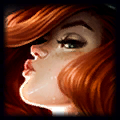

In [43]:
response = requests.get('http://ddragon.leagueoflegends.com/cdn/6.24.1/img/champion/MissFortune.png')
img = Image.open(BytesIO(response.content))
os.mkdir('tmp')
img.save('tmp/testChampIcon.png')
img

In [32]:
#from Tkinter import *
import tkinter
from PIL import ImageTk, Image
#import PIL.Image
#import PIL.ImageTk


In [39]:
del(root)
root = tkinter.Tk()

photo = tkinter.PhotoImage(img)

label = tkinter.Label(root, image=photo)
label.image = photo  # keep a reference!
label.grid(row=0)

root.mainloop()

TypeError: __str__ returned non-string (type _io.BytesIO)